## **Importing the Required Libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
chu = pd.read_csv('/Users/akashsharma/Downloads/My Space/online-study/yash_notes/csv files/logistic/Churn.csv')


## Checking the nulls

In [15]:
# finding null            // no null in this file
chu.isnull().sum()[chu.isnull().sum()>0]



Series([], dtype: int64)

## Checking the Datatype


In [4]:
chu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Converting non-numeric data into numeric data

In [16]:
chu.columns[chu.dtypes=='object']

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [5]:
chu.gender.replace({'Female': 0, 'Male':1}, inplace=True)
chu.OnlineSecurity.replace({'No':0, 'Yes':1, 'No internet service': 2},inplace=True)
chu.OnlineBackup.replace({'Yes':1, "No":0, 'No internet service': 2}, inplace=True)
chu.DeviceProtection.replace({'No':0 , 'Yes':1, 'No internet service': 2}, inplace=True)
chu.TechSupport.replace({'No': 0, 'Yes':1, 'No internet service': 2}, inplace=True)
chu.StreamingTV.replace({'No':0, 'Yes':1, 'No internet service': 2}, inplace=True)
chu.StreamingMovies.replace({'No':0, 'Yes':1, 'No internet service': 2}, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chu[chu.select_dtypes (include = "object").columns] = chu[chu.select_dtypes (include = "object").columns].apply(le.fit_transform)
chu.columns[chu.dtypes=='object']

Index([], dtype='object')

In [8]:
chu.drop('customerID', axis=1, inplace=True)

## Visualizing the Data

In [9]:
import warnings 
warnings.filterwarnings("ignore")

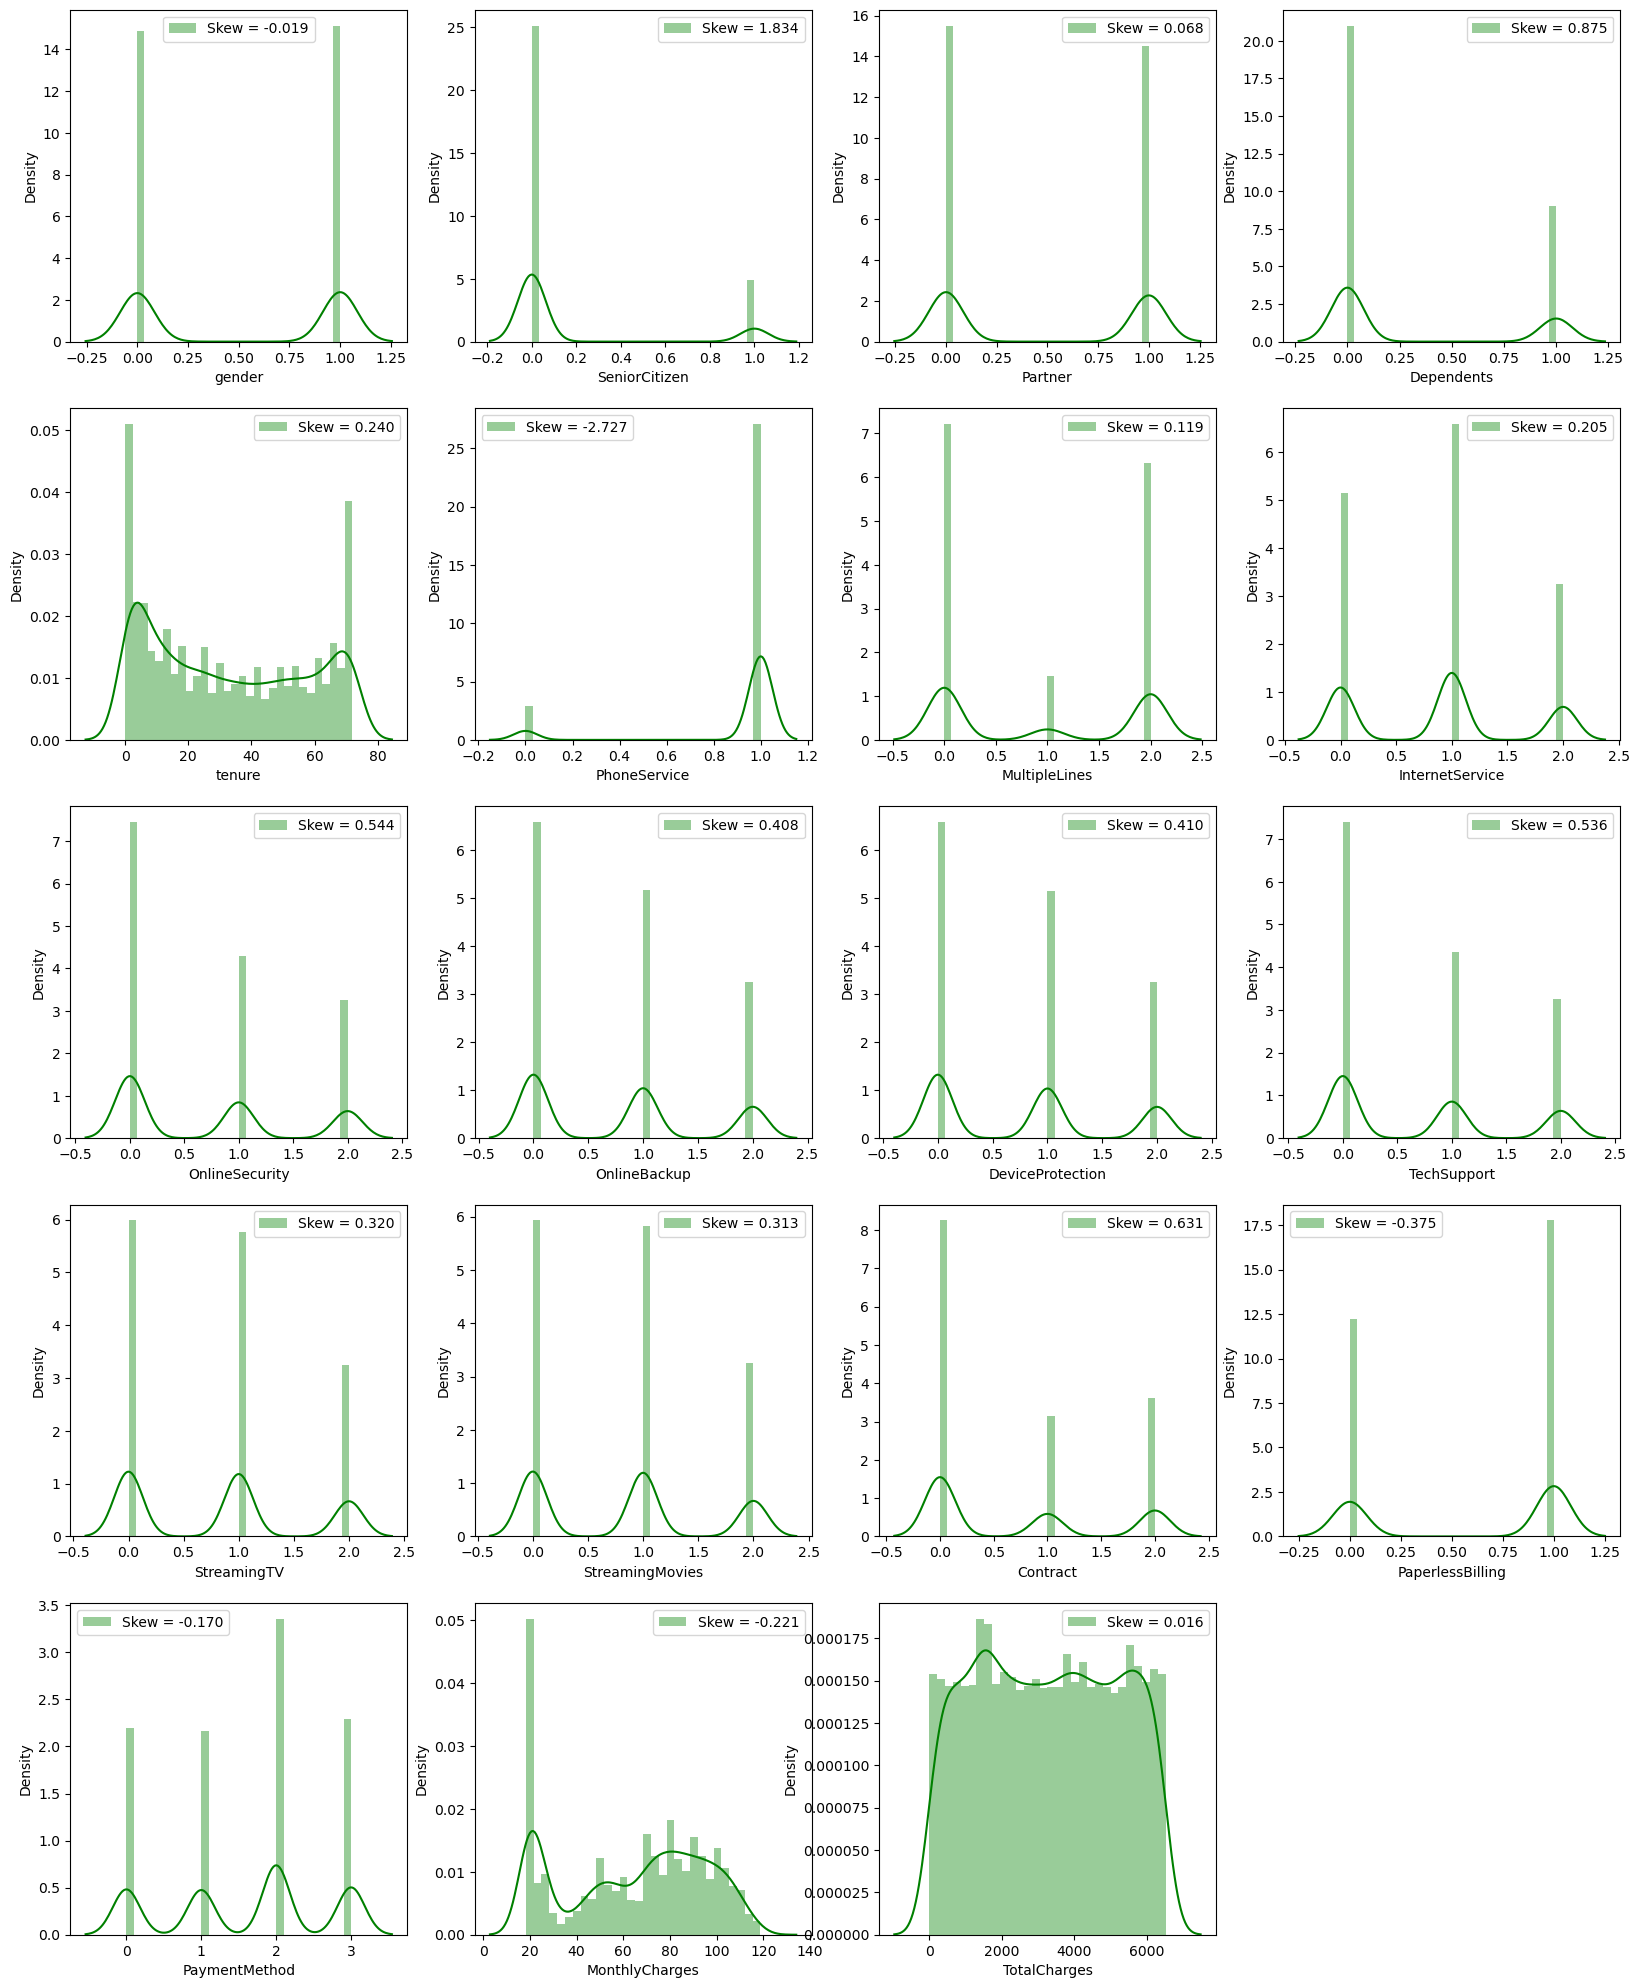

In [10]:
a=[cols for cols in chu.columns if chu[cols].dtypes != 'O']
plotnumber = 1
plt.figure(figsize=(20,25))
for i in a:
    if plotnumber<= 19:
        ax = plt.subplot(5,4,plotnumber)
        skew = chu[i].skew()
        sns.distplot(chu[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
        plt.legend(loc='best')
    plotnumber+=1
plt.show()

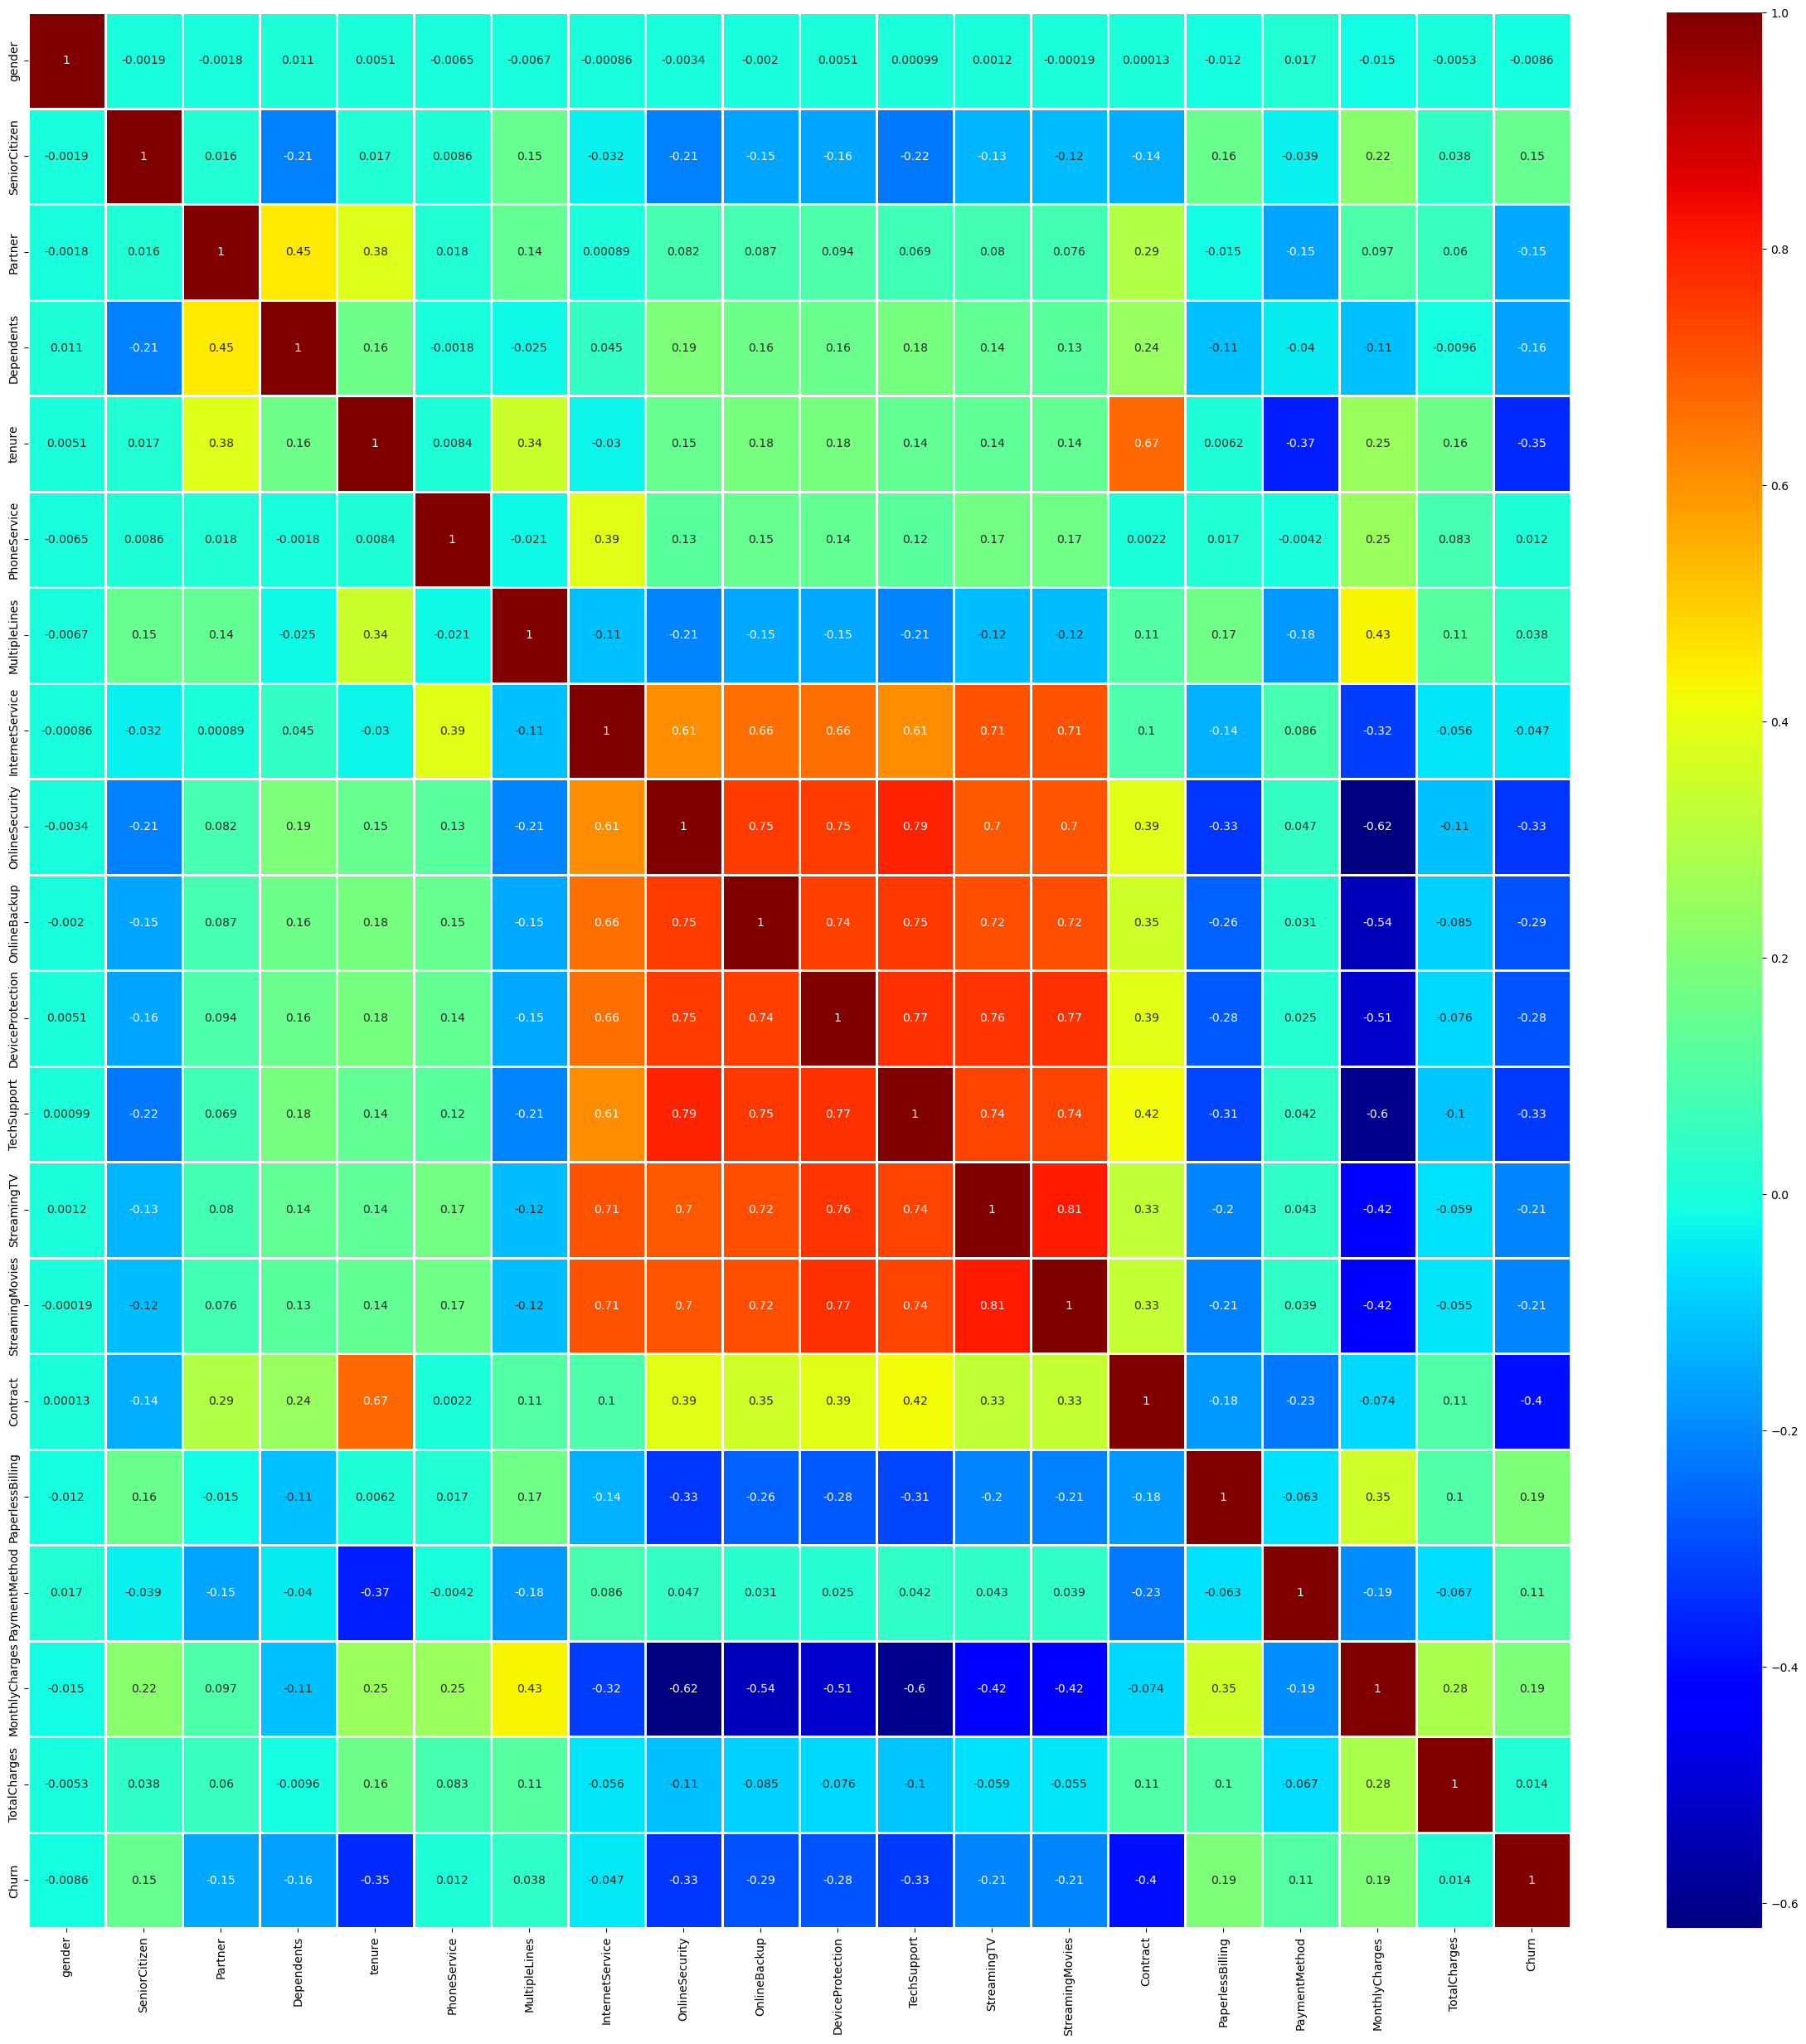

In [11]:
plt.figure(figsize=(30, 30))  
sns.heatmap(data=chu.corr(), cmap="jet", annot=True, linewidths=1, linecolor='white')
plt.show()

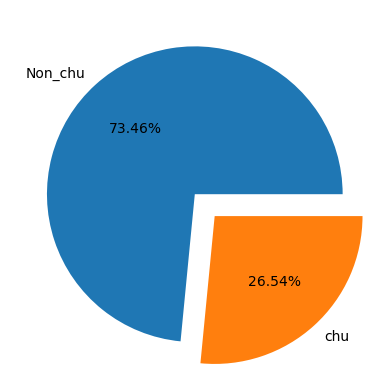

In [12]:
lable = ["Non_chu", "chu"]
exp = (0, 0.2)  

plt.pie(chu['Churn'].value_counts(), labels=lable, autopct='%1.2f%%', explode=exp)
plt.show()

From this pie chart we can see that the percentage of Churn rate is comparitively less. **26.54%** is the churn rate

## Random sampling

In [13]:
from sklearn.model_selection import train_test_split
chu_tr, chu_ts = train_test_split(chu, test_size= .2)
chu_ts.shape

(1409, 20)

In [14]:
# train 
tr_x = chu_tr.drop(['Churn'], axis=1)
tr_x.shape
tr_y = chu_tr.iloc[:, -1]
tr_y.shape

(5634,)

In [22]:
# test 
ts_x = chu_ts.drop(['Churn'], axis=1)
ts_x.shape
ts_y = chu_ts.iloc[:, -1]
ts_y.shape

(1409,)

In [23]:
chu.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [24]:
chu1 = chu_tr[chu_tr.Churn == 1]
chu1.shape

(1503, 20)

In [25]:
chu_tr_new = pd.concat([chu_tr, chu1, chu1, chu1])

In [26]:
chu_tr_new.Churn.value_counts()

1    6012
0    4131
Name: Churn, dtype: int64

In [27]:
chu_tr.Churn.value_counts()

0    4131
1    1503
Name: Churn, dtype: int64

In [28]:
# new train-x, train-y
tr_x_new = chu_tr_new.drop(['Churn'], axis=1)
tr_x_new.shape
tr_y_new = chu_tr_new.iloc[:, -1]
tr_y_new.shape

(10143,)

In [29]:
# Hyper parameter for decision tree
from sklearn.model_selection import GridSearchCV

In [30]:
search_dict = {"criterion" : ["gini" , "entropy"],
                "max_depth" : range(3,10)}

In [75]:
grid = GridSearchCV(dt , param_grid= search_dict)

In [76]:
grid.fit(tr_x_new , tr_y_new)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=9),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})

In [77]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9)

In [78]:
# hyper parameter for random forest
search_dictRF = {'criterion':['gini','entropy'],
                'max_depth': range(3,10),
               'n_estimators': range(100,300,50)}

In [79]:
gridRF = GridSearchCV(rf , param_grid= search_dictRF)

In [80]:
gridRF.fit(tr_x_new , tr_y_new)

GridSearchCV(estimator=RandomForestClassifier(max_depth=9, n_estimators=150),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'n_estimators': range(100, 300, 50)})

In [81]:
gridRF.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=200)

## **Logistics Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 

In [33]:
lr.fit(tr_x_new, tr_y_new)

LogisticRegression()

In [34]:
pred_lr = lr.predict(ts_x)

In [35]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve

In [36]:
lr_cm = confusion_matrix(ts_y, pred_lr)
lr_cm 

array([[695, 348],
       [ 63, 303]])

In [37]:
recall_lr = recall_score(ts_y, pred_lr)
recall_lr

0.8278688524590164

In [38]:
accuracy_lr = accuracy_score(ts_y, pred_lr)
accuracy_lr

0.7083037615330021

In [39]:
precision_lr = precision_score(ts_y, pred_lr)
precision_lr

0.46543778801843316

## **Decision tree**

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9) 

In [41]:
dt.fit(tr_x_new, tr_y_new)

DecisionTreeClassifier(max_depth=9)

In [42]:
pdt = dt.predict(ts_x)

In [43]:
cmdt = confusion_matrix(ts_y, pdt)
cmdt

array([[679, 364],
       [ 84, 282]])

In [44]:
accuracy_dt = accuracy_score(ts_y, pdt)
accuracy_dt

0.6820440028388929

In [45]:
recall_dt = recall_score(ts_y, pdt)
recall_dt

0.7704918032786885

In [46]:
precision_dt = precision_score(ts_y, pdt)
precision_dt

0.43653250773993807

## **Random forest**

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9, n_estimators=200)


In [83]:
rf.fit(tr_x_new, tr_y_new)

RandomForestClassifier(max_depth=9, n_estimators=200)

In [84]:
prf = rf.predict(ts_x)

In [85]:
cmrf = confusion_matrix(ts_y, prf)
cmrf

array([[731, 312],
       [ 81, 285]])

In [86]:
recall_rf = recall_score(ts_y, prf)
recall_rf

0.7786885245901639

In [87]:
accuracy_rf = accuracy_score(ts_y, prf)
accuracy_rf

0.7210787792760823

In [88]:
precision_rf = precision_score(ts_y, prf)
precision_rf

0.47738693467336685

## **Naive Bayes**

In [54]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [55]:
nb.fit(tr_x_new , tr_y_new)

BernoulliNB()

In [56]:
pred_nb = nb.predict(ts_x)
pred_nb

array([1, 0, 0, ..., 1, 1, 0])

In [57]:
confusion_matrix(ts_y , pred_nb)

array([[690, 353],
       [ 78, 288]])

In [58]:
accuracy_NB = accuracy_score(ts_y , pred_nb)
accuracy_NB

0.6941092973740242

In [59]:
recall_NB = recall_score(ts_y , pred_nb)
recall_NB

0.7868852459016393

In [60]:
precision_NB = precision_score(ts_y , pred_nb)
precision_NB

0.44929797191887677

## **Gradient Boosting**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [62]:
gbc.fit(tr_x_new , tr_y_new)

GradientBoostingClassifier()

In [63]:
pred_gbc = gbc.predict(ts_x)

In [64]:
confusion_matrix(ts_y , pred_gbc)

array([[705, 338],
       [ 69, 297]])

In [65]:
accuracy_GB = accuracy_score(ts_y , pred_gbc)
accuracy_GB

0.7111426543647977

In [66]:
recall_GB = recall_score(ts_y , pred_gbc)
recall_GB

0.8114754098360656

In [67]:
precision_GB = precision_score(ts_y , pred_gbc)
precision_GB

0.46771653543307085

## **ADA Boosting**

In [68]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [69]:
abc.fit(tr_x_new , tr_y_new)

AdaBoostClassifier()

In [70]:
pred_abc = abc.predict(ts_x)

In [71]:
confusion_matrix(ts_y , pred_abc)

array([[697, 346],
       [ 57, 309]])

In [72]:
accuracy_ADA = accuracy_score(ts_y , pred_abc)
accuracy_ADA

0.7139815471965933

In [73]:
recall_ADA = recall_score(ts_y , pred_abc)
recall_ADA

0.8442622950819673

In [74]:
precision_ADA = precision_score(ts_y , pred_abc)
precision_ADA

0.4717557251908397

In [91]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'DecisionTreeClassifier', 
                                                      'RandomForestClassifier',
                                                          'Naive Bayes' , 
                                                    'GradientBoostingClassifier',
                                                    'AdaBoostClassifier'],
                                            'Accuracy': [accuracy_lr,
                                                         accuracy_dt,
                                                         accuracy_rf,
                                                         accuracy_NB ,
                                                        accuracy_GB,
                                                        accuracy_ADA],
                                          'Recall' : [recall_lr,
                                                     recall_dt,
                                                     recall_rf,
                                                      recall_NB,
                                                     recall_GB ,
                                                     recall_ADA],
                                          'Precision' : [precision_lr,
                                                        precision_dt,
                                                        precision_rf,
                                                         precision_NB,
                                                        precision_GB, 
                                                        precision_ADA]})

In [92]:
import tabulate as tb
print(tb.tabulate(model_performance_accuracy, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════════════╤════════════╤══════════╤═════════════╕
│    │ Model                      │   Accuracy │   Recall │   Precision │
╞════╪════════════════════════════╪════════════╪══════════╪═════════════╡
│  0 │ LogisticRegression         │   0.708304 │ 0.827869 │    0.465438 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  1 │ DecisionTreeClassifier     │   0.682044 │ 0.770492 │    0.436533 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  2 │ RandomForestClassifier     │   0.721079 │ 0.778689 │    0.477387 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  3 │ Naive Bayes                │   0.694109 │ 0.786885 │    0.449298 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  4 │ GradientBoostingClassifier │   0.711143 │ 0.811475 │    0.467717 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  5 │ AdaBoostClassifier         │   

# **Conclusion**

The project aimed to develop a classification model that predicts customer churn based on various factors such as subscription length, usage patterns, customer satisfaction, and support interactions. The dataset was explored and preprocessed to handle missing values, categorical variables, and imbalanced classes.

Several classification algorithms, including Logistic Regression, Random Forest etc, were trained and evaluated based on various metrics such as accuracy, precision, and recall. The AdaBoostClassifier algorithm performed the best with an accuracy of 71%, and recall of 84%.